In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from warnings import filterwarnings
filterwarnings("ignore")

In [394]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [395]:
del df["Cabin"]

In [396]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [397]:
df_manq = df[df["Age"].isnull()]

In [398]:
df.at[766, "Age"] = 42.00

In [399]:
#df["Embarked"] = [e.replace("NC") if e == "NaN" else e for e in df["Embarked"]]
df.at[(61, 829), "Embarked"] = "NC"

In [400]:
titre = list(df["Name"])
titre = [(i.split("."))[0] for i in titre]
titre = [(e.split(", "))[1] for e in titre]
#titre = [e[1] for e in titre]

In [401]:
# Creation de la colonne des titres
df["title"] = titre
df["title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [402]:
df["Age"].groupby(by=df["title"]).mean()

title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [403]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S,Mr


In [404]:
df["Age"] = df["Age"].fillna(df.groupby("title")["Age"].transform("mean"))

In [405]:
df.isnull().sum()/len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
title          0.0
dtype: float64

In [406]:
# Traitements de la colonne ticket
def extract_number(ticket):
    parts = ticket.split()
    for part in parts:
        if part.isdigit():
            return int(part)
    return 0

df["Ticket_number"] = df["Ticket"].apply(extract_number)


def extract_prefix(ticket):
    parts = ticket.split()
    if len(parts) > 1 and not parts[0].isdigit():
        return parts[0].replace(".", "").replace("/", "")
    return "NO_PREFİX"

df["Prefix_ticket"] = df["Ticket"].apply(extract_prefix)

    #Encodage des prefixes par frequence

prefix_counts = df["Prefix_ticket"].value_counts().to_dict()
df["Prefix_ticket_encoded"] = df["Prefix_ticket"].map(prefix_counts)

    # İdentification des goupes de passager partageant un ticket

ticket_counts = df["Ticket"].value_counts()
df["Group_size"] = df["Ticket"].map(ticket_counts)

In [407]:
df_trans = (df.drop("Ticket", axis = 1)).drop("Name", axis = 1)
df_trans.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Ticket_number,Prefix_ticket,Prefix_ticket_encoded,Group_size
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,21171,A5,21,1
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,17599,PC,60,1
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,3101282,STONO2,6,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,113803,NO_PREFİX,665,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,373450,NO_PREFİX,665,1


In [408]:
X = df_trans.drop("Survived", axis = 1)
y = df_trans["Survived"]

In [409]:
X = pd.get_dummies(X, drop_first=True, dtype=float)

In [410]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [411]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

Xt_logreg = scaler2.fit_transform(X_train)
Xtt_logreg = scaler2.transform(X_test)

## Model : Regression logistique

In [413]:
reg_log = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [414]:
param_grid = {"penalty": ['l1', 'l2'],
              "C": np.logspace(0, 4, 10)
              }

In [415]:
grid_logreg = GridSearchCV(reg_log, param_grid)

In [416]:
grid_logreg.fit(Xt_logreg, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [417]:
log_pred = grid_logreg.predict(Xtt_logreg)

In [418]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def perfo(pred, y_test):
    print(classification_report(y_test, pred))


    ConfusionMatrixDisplay.from_predictions(y_test, pred)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        70
           1       0.80      0.67      0.73        64

    accuracy                           0.76       134
   macro avg       0.77      0.76      0.76       134
weighted avg       0.77      0.76      0.76       134



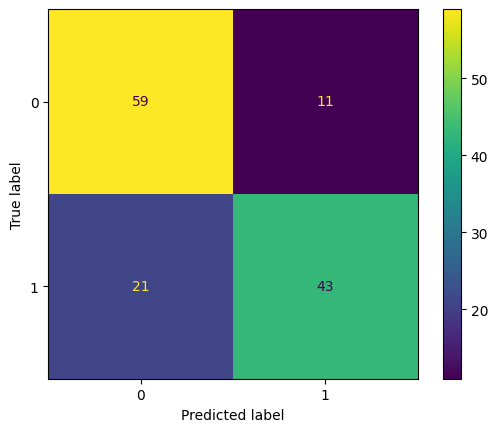

In [419]:
perfo(log_pred, y_test)

## Model : KNN

In [420]:
knn = KNeighborsClassifier()

In [422]:
param_knn = {"knn__n_neighbors":[3, 5, 10, 15],
    "knn__metric": ["minkowski", "euclidian"]
}

In [423]:
operations = [("scaler", scaler2), ("knn", knn)]


pipe = Pipeline(steps=operations)

In [424]:
grid_knn = GridSearchCV(pipe, param_grid=param_knn, cv = 5, scoring="accuracy")

In [425]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidian'],
                         'knn__n_neighbors': [3, 5, 10, 15]},
             scoring='accuracy')

In [426]:
knn_pred = grid_knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        70
           1       0.81      0.67      0.74        64

    accuracy                           0.77       134
   macro avg       0.78      0.76      0.76       134
weighted avg       0.77      0.77      0.77       134



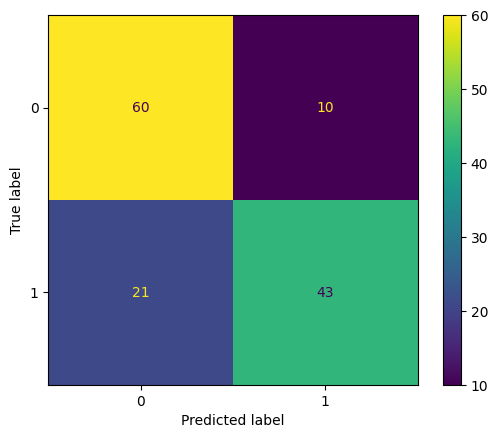

In [427]:
perfo(knn_pred, y_test)

## Model : SVM

In [428]:
svc = SVC()

In [430]:
operations = [("scaler", scaler1), ("svc", svc)]


pipe_svc = Pipeline(steps=operations)

In [431]:
param_svc = {"svc__C": [0.5, 0.8, 0.9, 0.95, 1.0],
    "svc__kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "svc__degree":[2, 3, 4],
    "svc__gamma": ['scale', 'auto'],
}

In [432]:
grid_svc = GridSearchCV(pipe_svc, param_grid=param_svc, cv=5, scoring="accuracy")

In [433]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.5, 0.8, 0.9, 0.95, 1.0],
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [434]:
grid_svc.best_params_

{'svc__C': 0.8, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

In [435]:
svc_pred = grid_svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        70
           1       0.87      0.70      0.78        64

    accuracy                           0.81       134
   macro avg       0.82      0.80      0.80       134
weighted avg       0.81      0.81      0.80       134



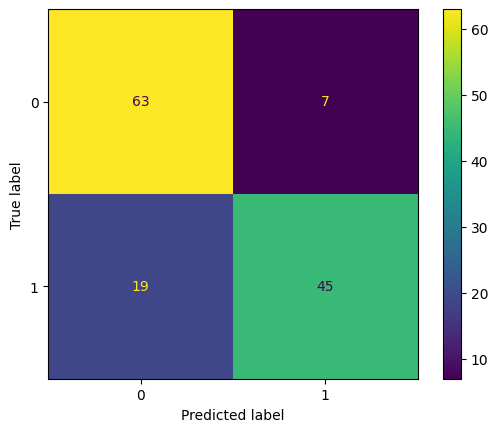

In [436]:
perfo(svc_pred, y_test)

## Adaboost

In [437]:
from sklearn.ensemble import RandomForestClassifier

In [438]:
ada = AdaBoostClassifier()

In [439]:
rfc = RandomForestClassifier()

In [441]:
param_ada = {"estimator": [rfc],
    "n_estimators":[50, 75, 128],
    "algorithm": ['SAMME', 'SAMME.R'],
    "random_state": [101]
}

In [442]:
ada_grid = GridSearchCV(ada, param_grid=param_ada, cv=5, scoring="accuracy")

In [443]:
ada_grid.fit(Xt_logreg, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [RandomForestClassifier()],
                         'n_estimators': [50, 75, 128], 'random_state': [101]},
             scoring='accuracy')

In [444]:
ada_pred = ada_grid.predict(Xtt_logreg)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        70
           1       0.87      0.64      0.74        64

    accuracy                           0.78       134
   macro avg       0.80      0.78      0.78       134
weighted avg       0.80      0.78      0.78       134



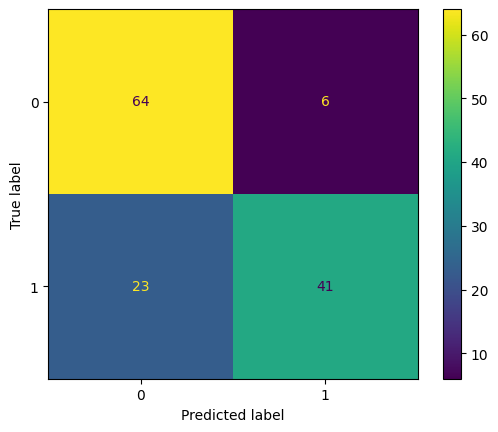

In [445]:
perfo(ada_pred, y_test)